In [1]:
import numpy as np
from numpy import array, argsort, arange

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

import sys
sys.path.insert(1, '../../../utils')
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, \
    plot_multiline_chart, plot_evaluation_results, plot_horizontal_bar_chart, \
    HEIGHT, plot_line_chart
from studies import naive_Bayes_study, logistic_regression_study, knn_study, trees_study, mlp_study, \
        run_all_nb, run_all_knn, run_all_lr, run_all_dt, run_all_mlp, run_all_rf, run_all_gb, \
        show_tree_and_importances_dt, show_importances_rf, show_importances_gb

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show, subplots

import pandas as pd


In [2]:
df = pd.read_csv("../data/prepared/best_model.csv")
df.head()

,crash_date,intersection_related_i,damage,num_units,injuries_fatal,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,traffic_control_device_BICYCLE CROSSING SIGN,...,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER,crash_type
0,1.090028,1,-0.913779,-0.163369,0.0,0.654986,-0.066570,1.452049,0.066571,False,...,False,False,False,False,False,True,False,False,False,0
1,1.106410,1,0.597795,-0.163369,0.0,-0.203471,-2.386418,-1.598500,0.358322,False,...,False,False,False,False,False,False,False,False,False,0
2,0.413855,1,-0.913779,2.619242,0.0,0.654986,-0.601920,0.435200,1.525324,False,...,False,False,False,False,False,False,False,False,False,0
3,1.102811,1,0.597795,-0.163369,0.0,-1.920385,1.004129,-0.073225,0.358322,False,...,False,False,False,False,False,True,False,False,False,1
4,1.113899,1,-0.913779,-0.163369,0.0,0.654986,0.111880,1.452049,0.358322,False,...,False,False,False,False,False,False,False,False,False,0


In [3]:
target_name = "crash_type"
file_tag = "traffic"
lab_folder = "lab4_modelling"
approach = "best"

target = df[target_name] #pulling target out before dropping non-numerics
features = df.drop(columns=[target_name])

print(features.info())
print("Features shape:", features.shape)
print("Target shape:", target.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234752 entries, 0 to 234751
Columns: 138 entries, crash_date to prim_contributory_cause_WEATHER
dtypes: bool(129), float64(8), int64(1)
memory usage: 45.0 MB
None
Features shape: (234752, 138)
Target shape: (234752,)


In [4]:
# train/test splitting
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.3,        #.7 train, .3 test
    random_state=42,      
    stratify=target       # keeps class proportions similar in train and test
)

**NAIVE BAYES ANALYSIS - TRAFFIC DATA**

Couldn't run MultinomialNB
['GaussianNB', 'BernoulliNB']
[0.46458744571654165, 0.7323405139571934]


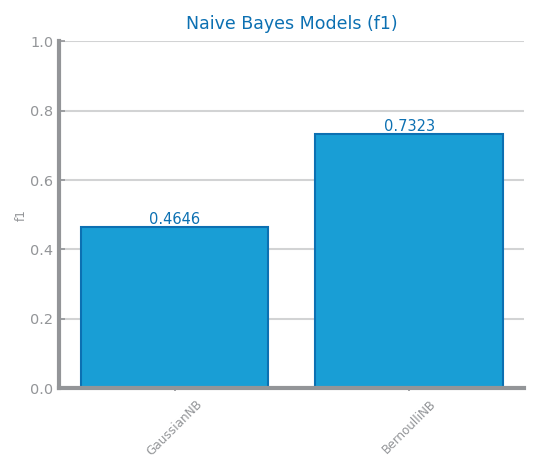

<Figure size 600x450 with 0 Axes>

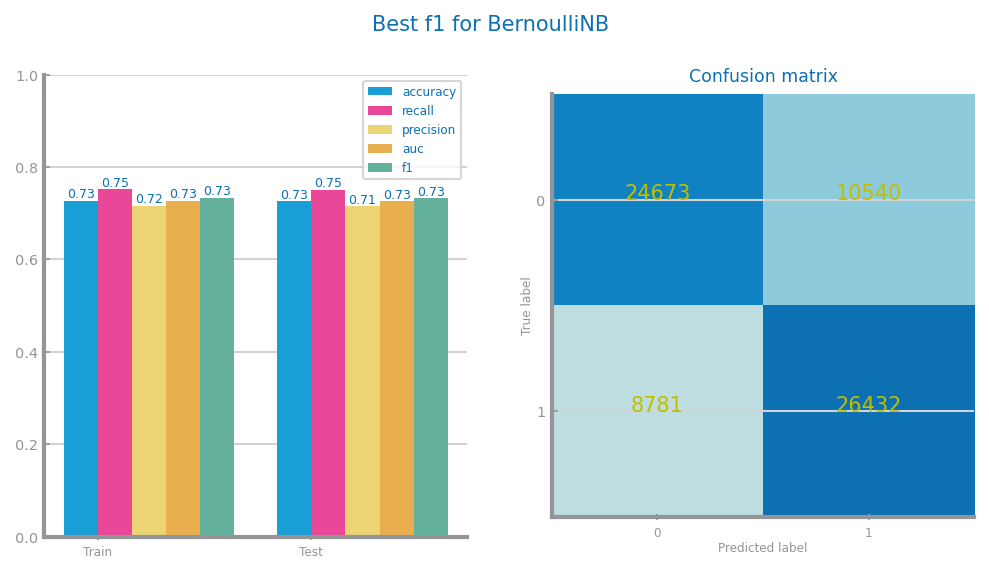

In [5]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    nb_best_model, nb_params = run_all_nb(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        eval_metric = el
    )

**LOGISTIC REGRESSION ANALYSIS - TRAFFIC DATA**

LR best for 500 iterations (penalty=l2) with f1=0.767224


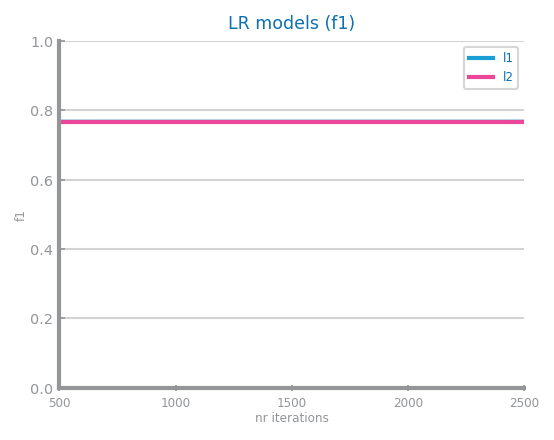

<Figure size 600x450 with 0 Axes>

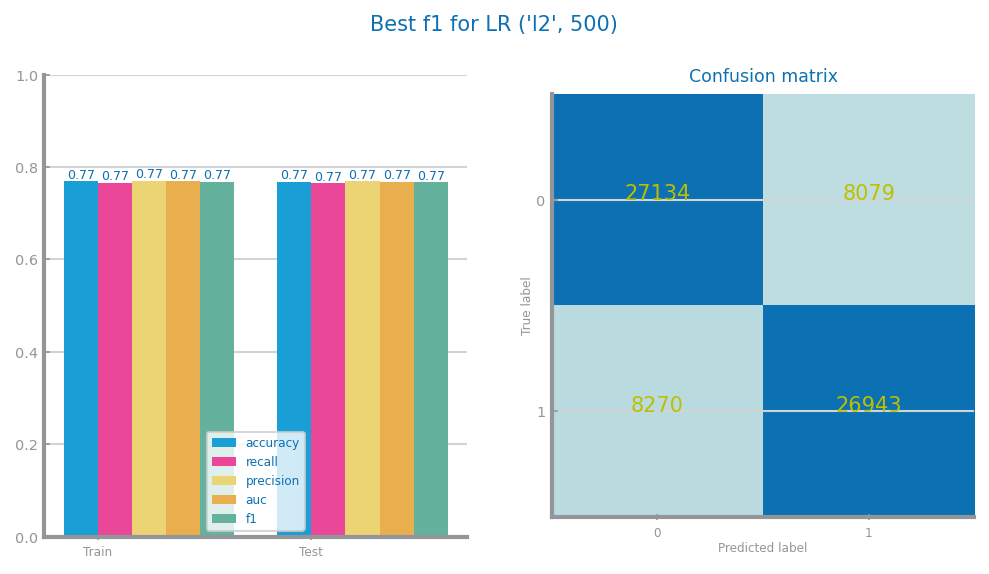

In [ ]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    lr_best_model, lr_params = run_all_lr(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_iterations=2500,
        lag=500,
        eval_metric = el
    )

**DECISION TREES ANALYSIS - TRAFFIC DATA**

DT best with gini and d=13


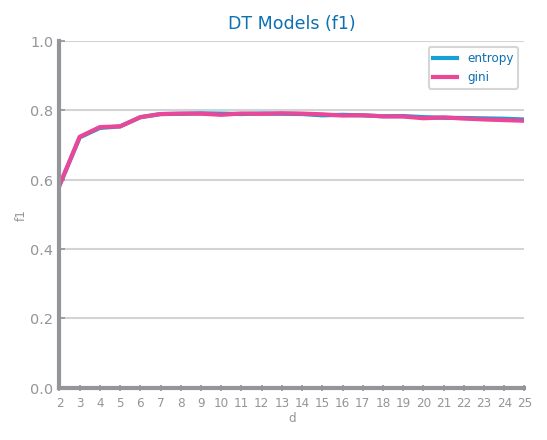

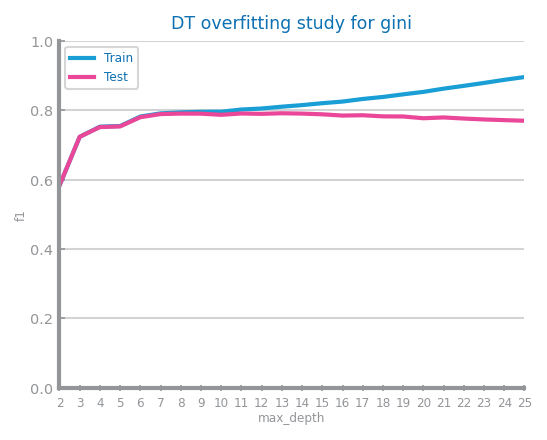

<Figure size 600x450 with 0 Axes>

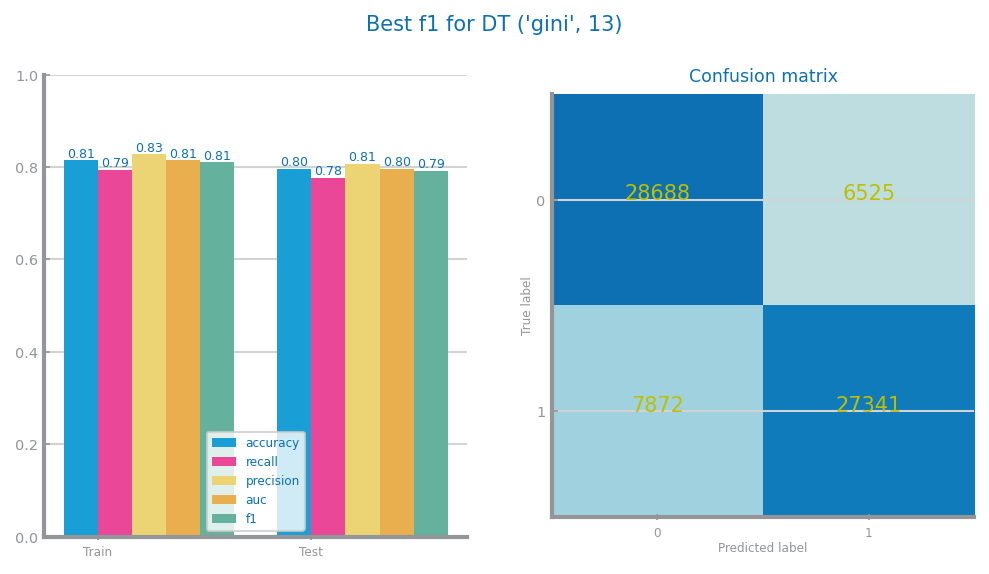

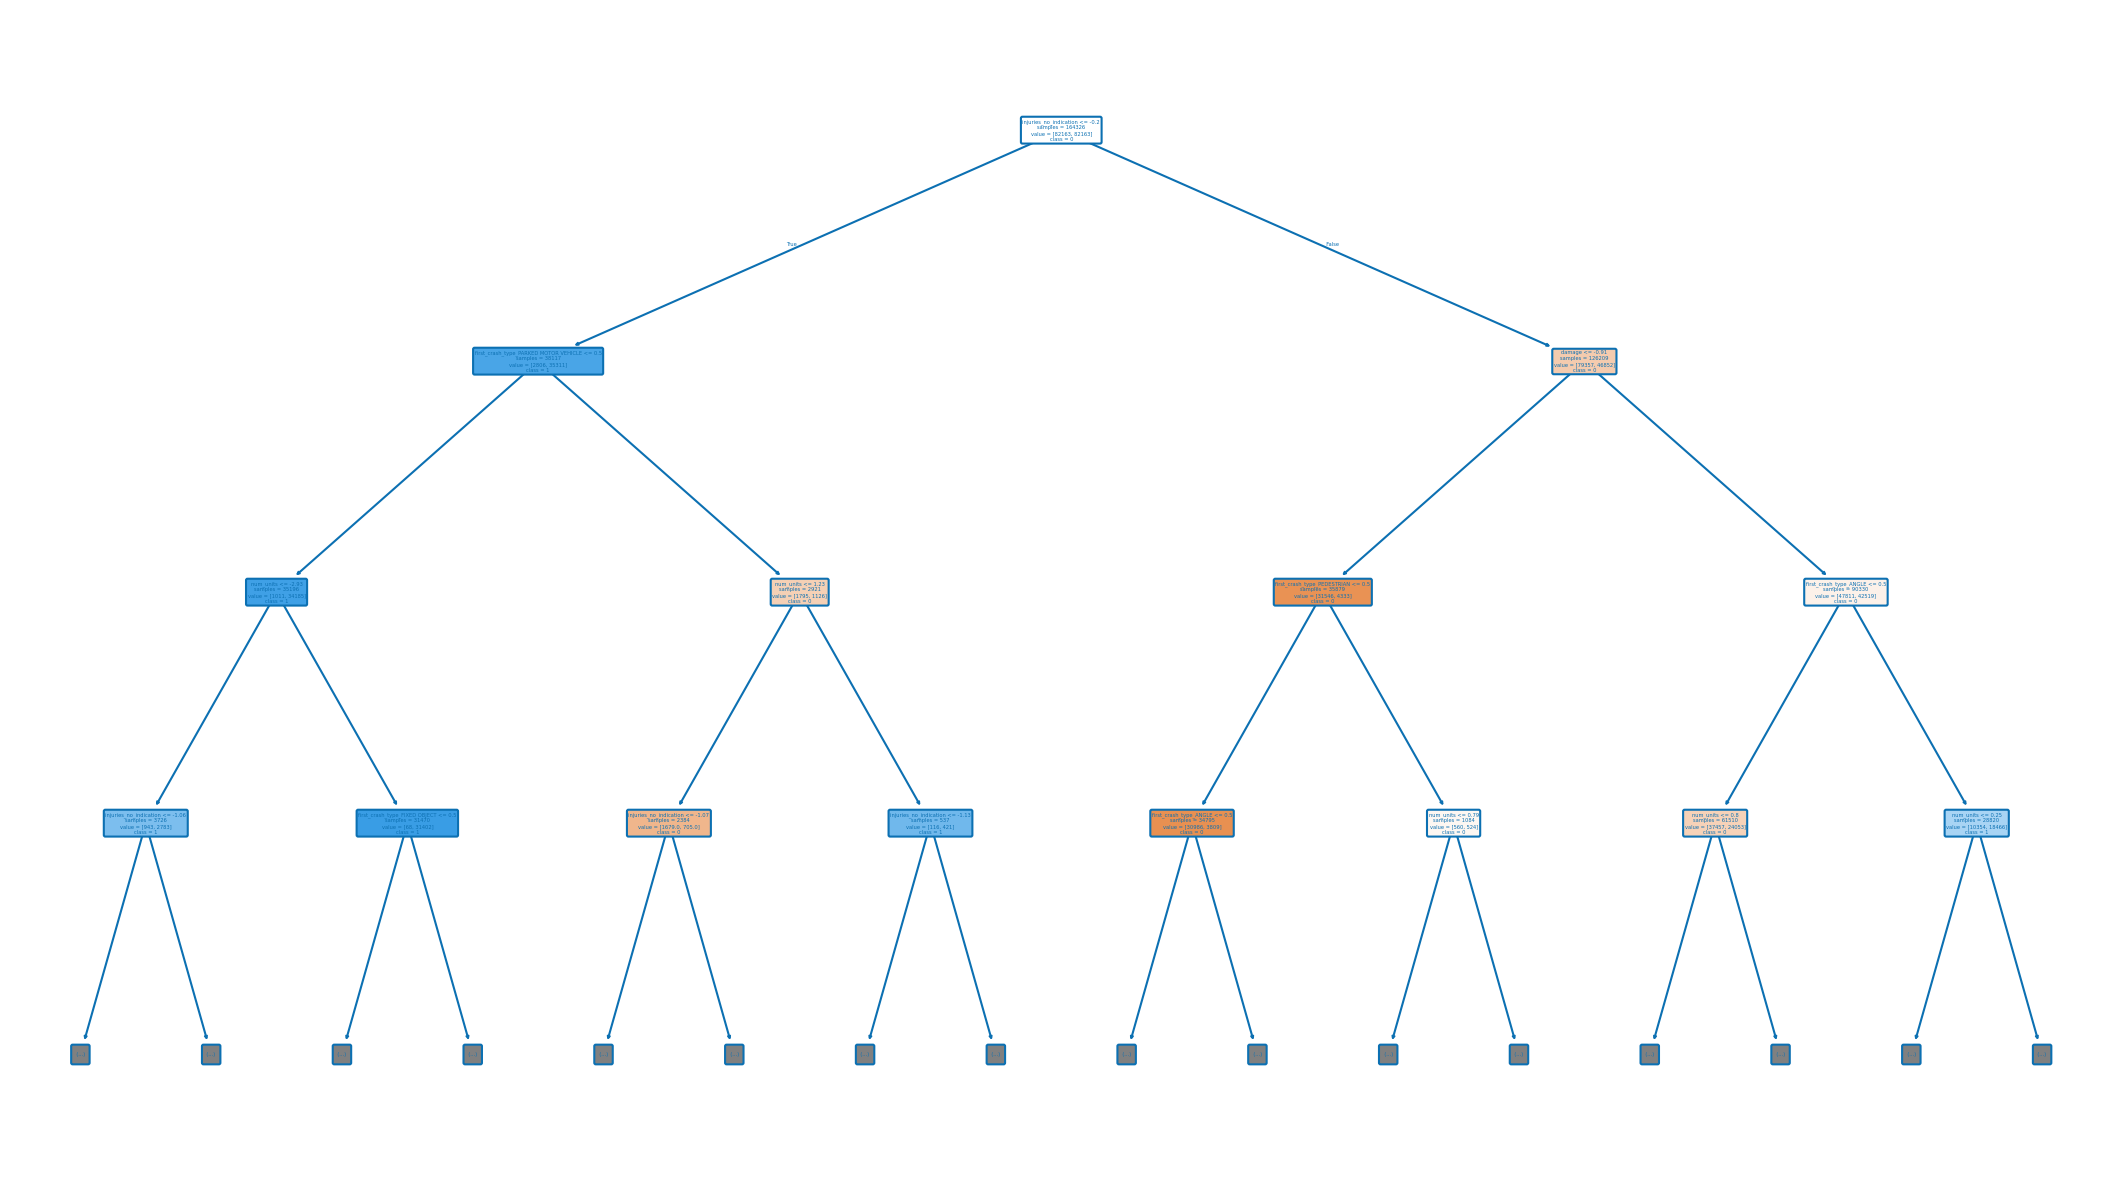

1. injuries_no_indication (0.4766447644963381)
2. damage (0.1612322901793384)
3. num_units (0.06495976388057424)
4. first_crash_type_ANGLE (0.062321412240400755)
5. first_crash_type_PARKED MOTOR VEHICLE (0.04540566206285686)
6. first_crash_type_TURNING (0.03437335460545436)
7. crash_date (0.02497909625354332)
8. crash_hour (0.01517739088690751)
9. prim_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY (0.012195188188997416)
10. prim_contributory_cause_DISREGARDING TRAFFIC SIGNALS (0.012085159411372271)
11. first_crash_type_PEDESTRIAN (0.010580778232330378)
12. first_crash_type_FIXED OBJECT (0.009101396780066637)
13. first_crash_type_HEAD ON (0.006710461610832239)
14. weather_condition_UNKNOWN (0.006263631376743092)
15. crash_month (0.005562680395079796)
16. prim_contributory_cause_FAILING TO REDUCE SPEED TO AVOID CRASH (0.005078278820210199)
17. lighting_condition_DARKNESS, LIGHTED ROAD (0.004324268569713043)
18. first_crash_type_PEDALCYCLIST (0.003411121861444012)
19. crash_day_of_week

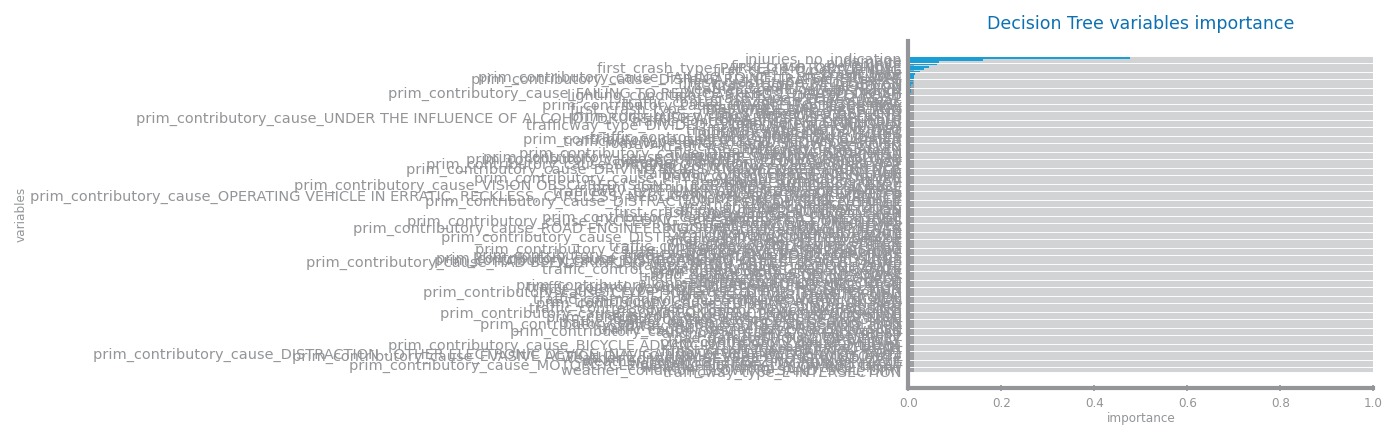

In [6]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    dt_best_model, dt_params = run_all_dt(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        d_max=25,
        lag=1,
        eval_metric = el
    )
    show_tree_and_importances_dt(
        features, target, dt_best_model, dt_params,
        lab_folder, file_tag, approach,
        max_depth2show=3
    )
    

**KNN ANALYSIS - TRAFFIC DATA**

In [ ]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    knn_best_model, knn_params = run_all_knn(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        k_max=35,
        lag=2,
        eval_metric = el
    )

**MLP ANALYSIS - TRAFFIC DATA**

MLP best for 100 iterations (lr_type=constant and lr=0.05) with f1=0.811788


<Figure size 600x450 with 0 Axes>

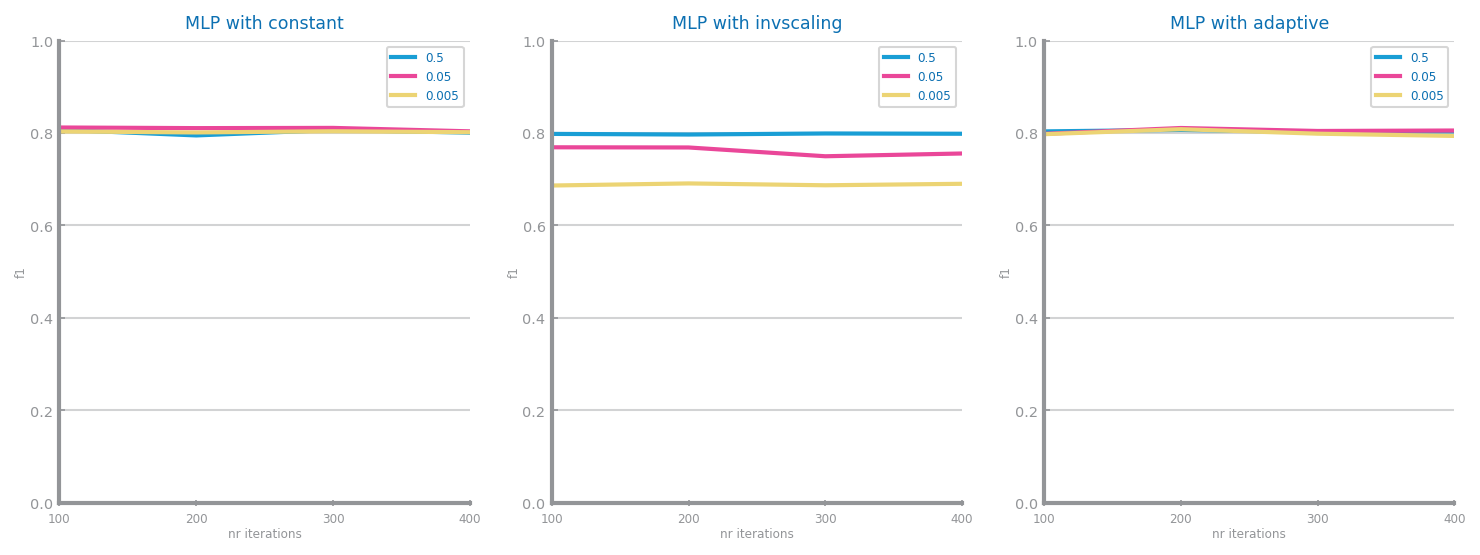

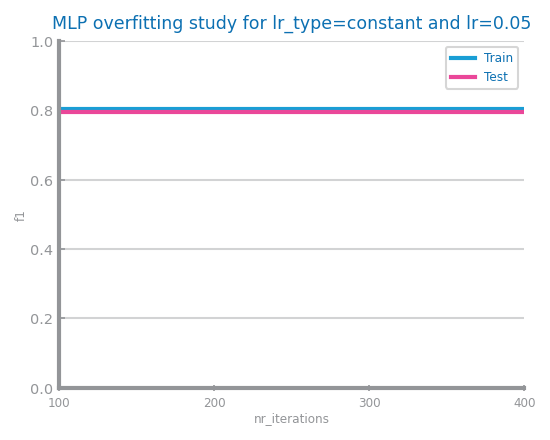

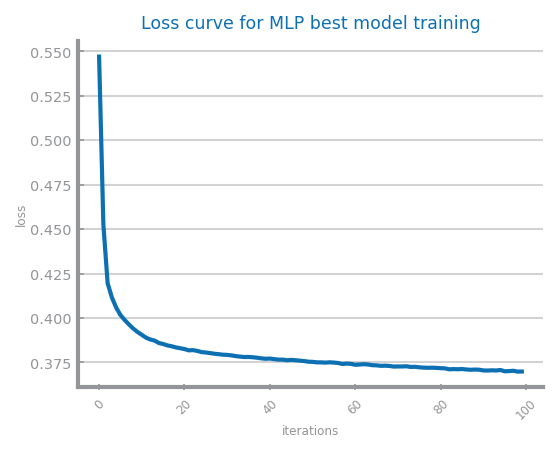

<Figure size 600x450 with 0 Axes>

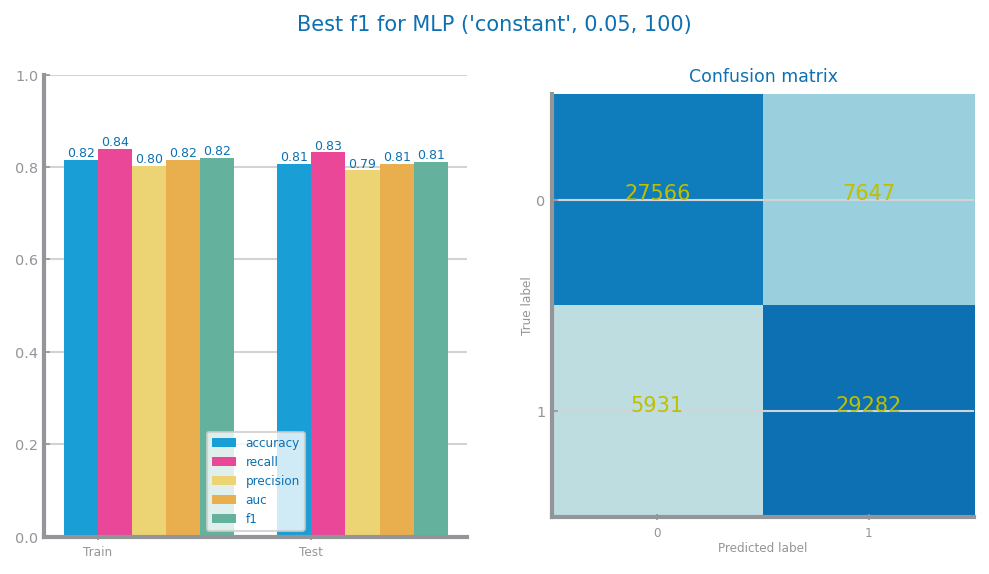

In [ ]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    mlp_best_model, mlp_params = run_all_mlp(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_iterations=400,
        lag=100,
        eval_metric = el
    )

**RANDOM FORESTS - TRAFFIC DATA**

KeyboardInterrupt: 

<Figure size 600x450 with 0 Axes>

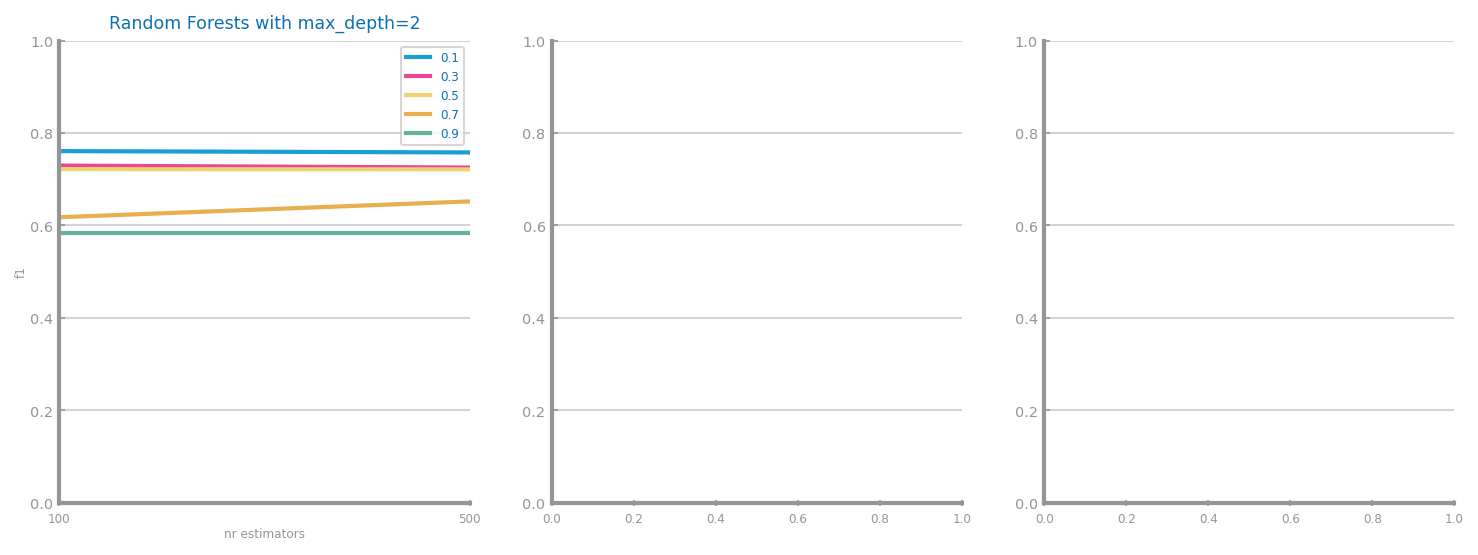

In [6]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    rf_best_model, rf_params = run_all_rf(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_trees=500,
        lag=500,
        eval_metric = el
    )
    show_importances_rf(features,
        rf_best_model, rf_params,
        lab_folder, file_tag, approach
    )

In [13]:
show_importances_rf(features,
        rf_best_model, rf_params,
        lab_folder, file_tag, approach
)

TypeError: 'builtin_function_or_method' object is not subscriptable

**GRADIENT BOOSTING OR XGBOOST - TRAFFIC DATA**

In [ ]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    gb_best_model, gb_params = run_all_gb(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_trees=500,
        lag=500,
        eval_metric = el
    )
    show_importances_gb(features,
        gb_best_model, gb_params,
        lab_folder, file_tag, approach
    )
